In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [8]:
# Arrangement of data directories and filepaths

data_dir = "../data/raw_csvs"
TimeAge_filepath = os.path.join(data_dir, "TimeAge.csv")
TimeGender_filepath = os.path.join(data_dir, "TimeGender.csv")
Policy_filepath = os.path.join(data_dir, "Policy.csv")
Time_filepath = os.path.join(data_dir, "Time.csv")
TimeProvince_filepath = os.path.join(data_dir, "TimeProvince.csv")
PatientInfo_filepath = os.path.join(data_dir, "PatientInfo.csv")
SearchTrend_filepath = os.path.join(data_dir, "SearchTrend.csv")
SeoulFloating_filepath = os.path.join(data_dir, "SeoulFloating.csv")
Weather_filepath = os.path.join(data_dir, "Weather.csv")
Case_filepath = os.path.join(data_dir, "Case.csv")
Region_filepath = os.path.join(data_dir, "Region.csv")

In [9]:
# Arrangement of dataframes

TimeAge_df = pd.read_csv(TimeAge_filepath)
TimeGender_df = pd.read_csv(TimeGender_filepath)
Policy_df = pd.read_csv(Policy_filepath)
Time_df = pd.read_csv(Time_filepath)
TimeProvince_df = pd.read_csv(TimeProvince_filepath)
PatientInfo_df = pd.read_csv(PatientInfo_filepath)
SearchTrend_df = pd.read_csv(SearchTrend_filepath)
SeoulFloating_df = pd.read_csv(SeoulFloating_filepath)
Weather_df = pd.read_csv(Weather_filepath)
Case_df = pd.read_csv(Case_filepath)
Region_df = pd.read_csv(Region_filepath)

In [10]:
# The dataframes that include a `date` column in them
dfs = [TimeAge_df, TimeGender_df, TimeProvince_df, Time_df, SearchTrend_df, SeoulFloating_df, Weather_df]

In [45]:
# Dataframes with dates (2020-03-02 - 2020-06-30)
TimeAge_df = pd.pivot(TimeAge_df, index='date', columns="age", values=['confirmed', 'deceased']).swaplevel(0,1,axis=1).reset_index()
TimeAge_df.columns = TimeAge_df.columns.map('_'.join)

TimeGender_df = pd.pivot(TimeGender_df, index='date', columns="sex", values=['confirmed', 'deceased']).swaplevel(0,1,axis=1).reset_index()
TimeGender_df.columns = TimeGender_df.columns.map('_'.join)

TimeAgeGender_df = pd.merge(TimeAge_df, TimeGender_df, on='date_')

# Dataframes with dates (2020-01-20 - 2020-06-30)
TimeProvince_df = pd.pivot(TimeProvince_df, index='date', columns="province", values=['confirmed', 'deceased', 'released']).swaplevel(0,1,axis=1).reset_index()
TimeProvince_df.columns = TimeProvince_df.columns.map('_'.join)

#Time_df

TimeProvinceTime_df = pd.merge(TimeProvince_df, Time_df, how='left', left_on=['date_'], right_on=['date'])
TimeProvinceTime_df = TimeProvinceTime_df.drop('date', 1)

# Dataframes with dates (2020-01-01 - 2020-06-29)

Weather_df = pd.pivot(Weather_df, index='date', columns="province", values=['code','avg_temp', 'min_temp', 'max_temp', 'precipitation', 'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity']).swaplevel(0,1,axis=1).reset_index()
Weather_df.columns = Weather_df.columns.map('_'.join)

#SearchTrend_df

WeatherSearchTrend_df = pd.merge(Weather_df, SearchTrend_df, how='left', left_on=['date_'], right_on=['date'])
WeatherSearchTrend_df = WeatherSearchTrend_df.drop('date', 1)

# Dataframes with dates (2020-01-01 - 2020-05-31)
#SeoulFloating_df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [46]:
TimeAge_df

,date_,0s_confirmed,10s_confirmed,20s_confirmed,30s_confirmed,40s_confirmed,50s_confirmed,60s_confirmed,70s_confirmed,80s_confirmed,0s_deceased,10s_deceased,20s_deceased,30s_deceased,40s_deceased,50s_deceased,60s_deceased,70s_deceased,80s_deceased
0,2020-03-02,32,169,1235,506,633,834,530,192,81,0,0,0,1,1,5,6,6,3
1,2020-03-03,34,204,1417,578,713,952,597,224,93,0,0,0,1,1,5,7,9,5
2,2020-03-04,34,233,1575,631,790,1051,646,260,108,0,0,0,1,1,5,7,12,6
3,2020-03-05,38,257,1727,659,847,1127,699,288,124,0,0,0,1,1,5,8,13,7
4,2020-03-06,45,292,1877,693,889,1217,763,340,168,0,0,0,1,1,5,11,14,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2020-06-26,184,698,3317,1463,1651,2264,1633,839,553,0,0,0,2,3,15,41,82,139
117,2020-06-27,185,700,3331,1473,1657,2269,1640,843,555,0,0,0,2,3,15,41,82,139
118,2020-06-28,187,703,3343,1485,1667,2275,1653,846,556,0,0,0,2,3,15,41,82,139
119,2020-06-29,190,704,3352,1490,1673,2280,1665,847,556,0,0,0,2,3,15,41,82,139


In [47]:
dates = TimeAge_df['date_'].unique()
ages_confirmed = list()
ages_deceased = list()
for col in TimeAge_df.columns.to_list():
  if 'confirmed' in col:
    ages_confirmed.append(col)
  if 'deceased' in col:
    ages_deceased.append(col)

TimeAge_dates_ages_confirmed = list()
TimeAge_dates_ages_deceased = list()
for date in dates:
  date_TimeAge_df = TimeAge_df[TimeAge_df['date_'] == date]
  TimeAge_ages_confirmed = dict()
  TimeAge_ages_deceased = dict()
  for age in ages_confirmed:
    date_age_TimeAge_df = date_TimeAge_df[age]
    TimeAge_ages_confirmed[age] = date_age_TimeAge_df.to_list()[0]
  for age in ages_deceased:
    date_age_TimeAge_df = date_TimeAge_df[age]
    TimeAge_ages_deceased[age] = date_age_TimeAge_df.to_list()[0]
  TimeAge_dates_ages_confirmed.append((date, TimeAge_ages_confirmed))
  TimeAge_dates_ages_deceased.append((date, TimeAge_ages_deceased))

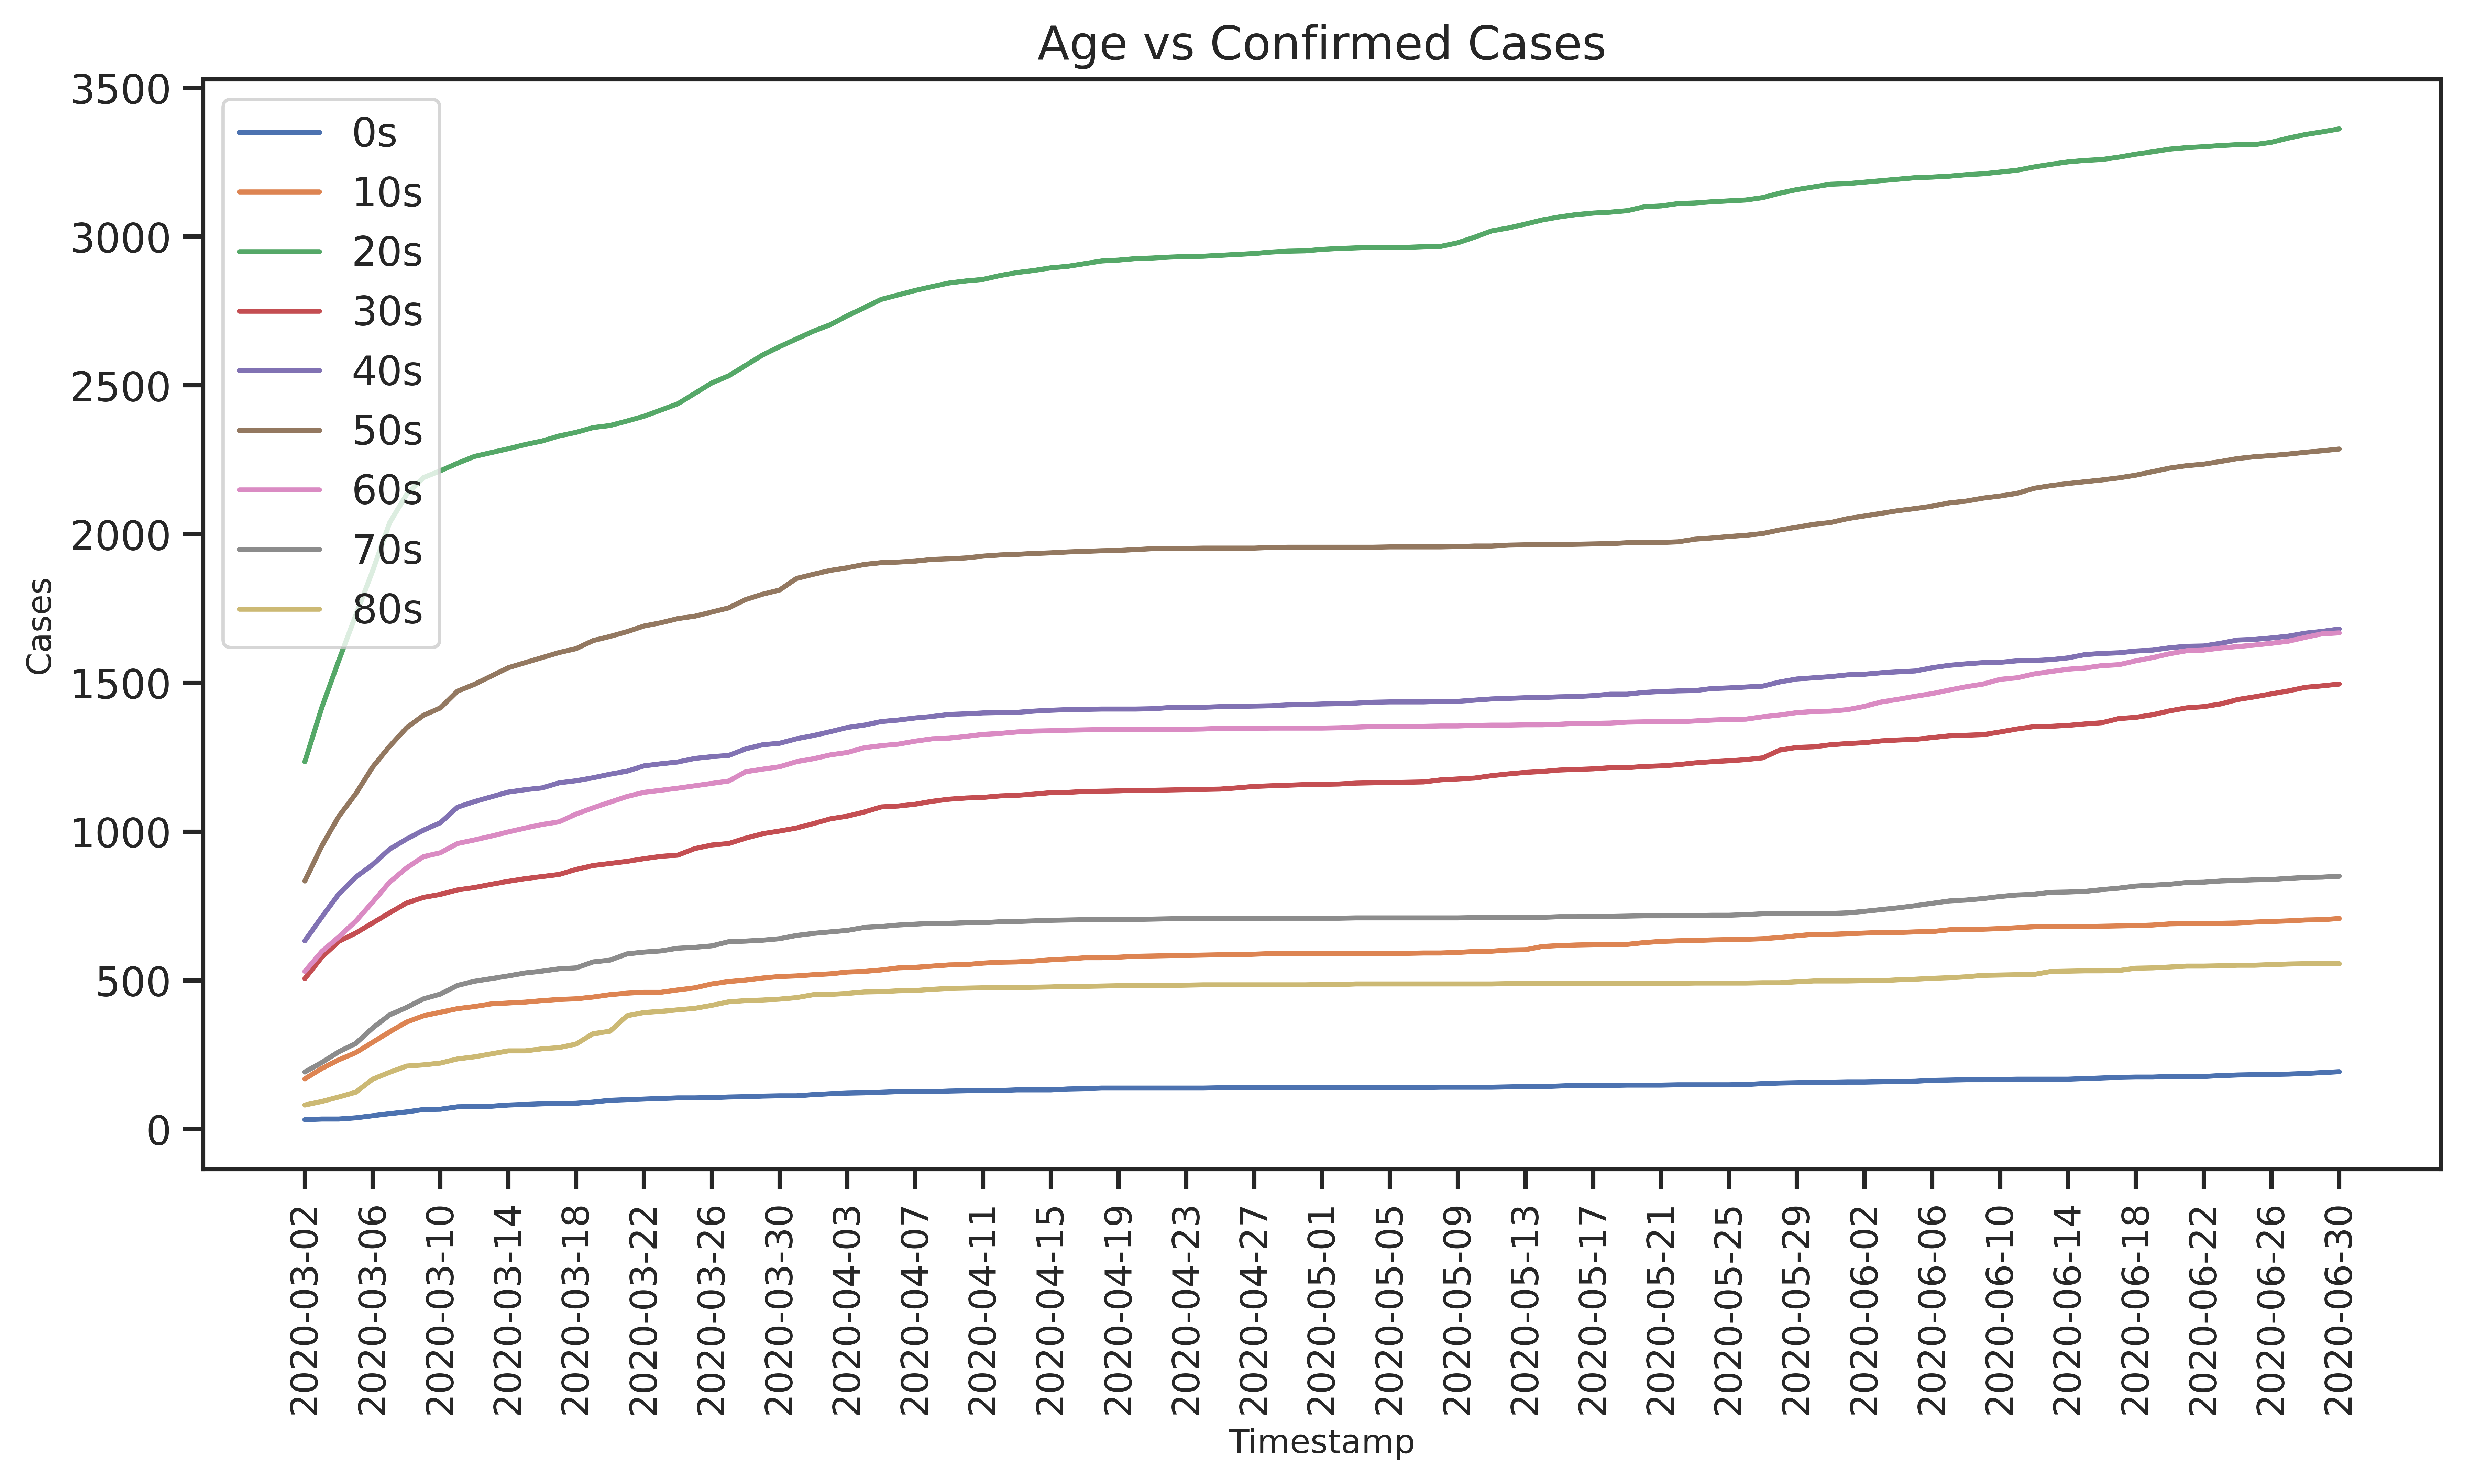

<Figure size 8400x4200 with 0 Axes>

In [54]:
sns.set(rc={"figure.dpi":700, 'savefig.dpi':700})
sns.set_style('ticks')
fontsize = 12

plt.rcParams["figure.figsize"] = (12, 6)
plt.title("Age vs Confirmed Cases", fontsize=14)
plt.ylabel("Cases", fontsize=10)
plt.xlabel("Timestamp", fontsize=10)

plt.xticks(list(range(len(dates))), dates[::4], rotation='vertical')
plt.locator_params(axis='x', nbins=len(dates)/4)
plt.yticks(fontsize= fontsize)

for i in range(len(ages_confirmed)):
  age = [list(x[1].items())[i][0] for x in TimeAge_dates_ages_confirmed][0]
  age_list = [list(x[1].items())[i][1] for x in TimeAge_dates_ages_confirmed]
  plt.plot(age_list, label = str(age).split('_')[0], linestyle='-')


plt.legend(prop={'size': fontsize})
plt.show()
plt.clf()

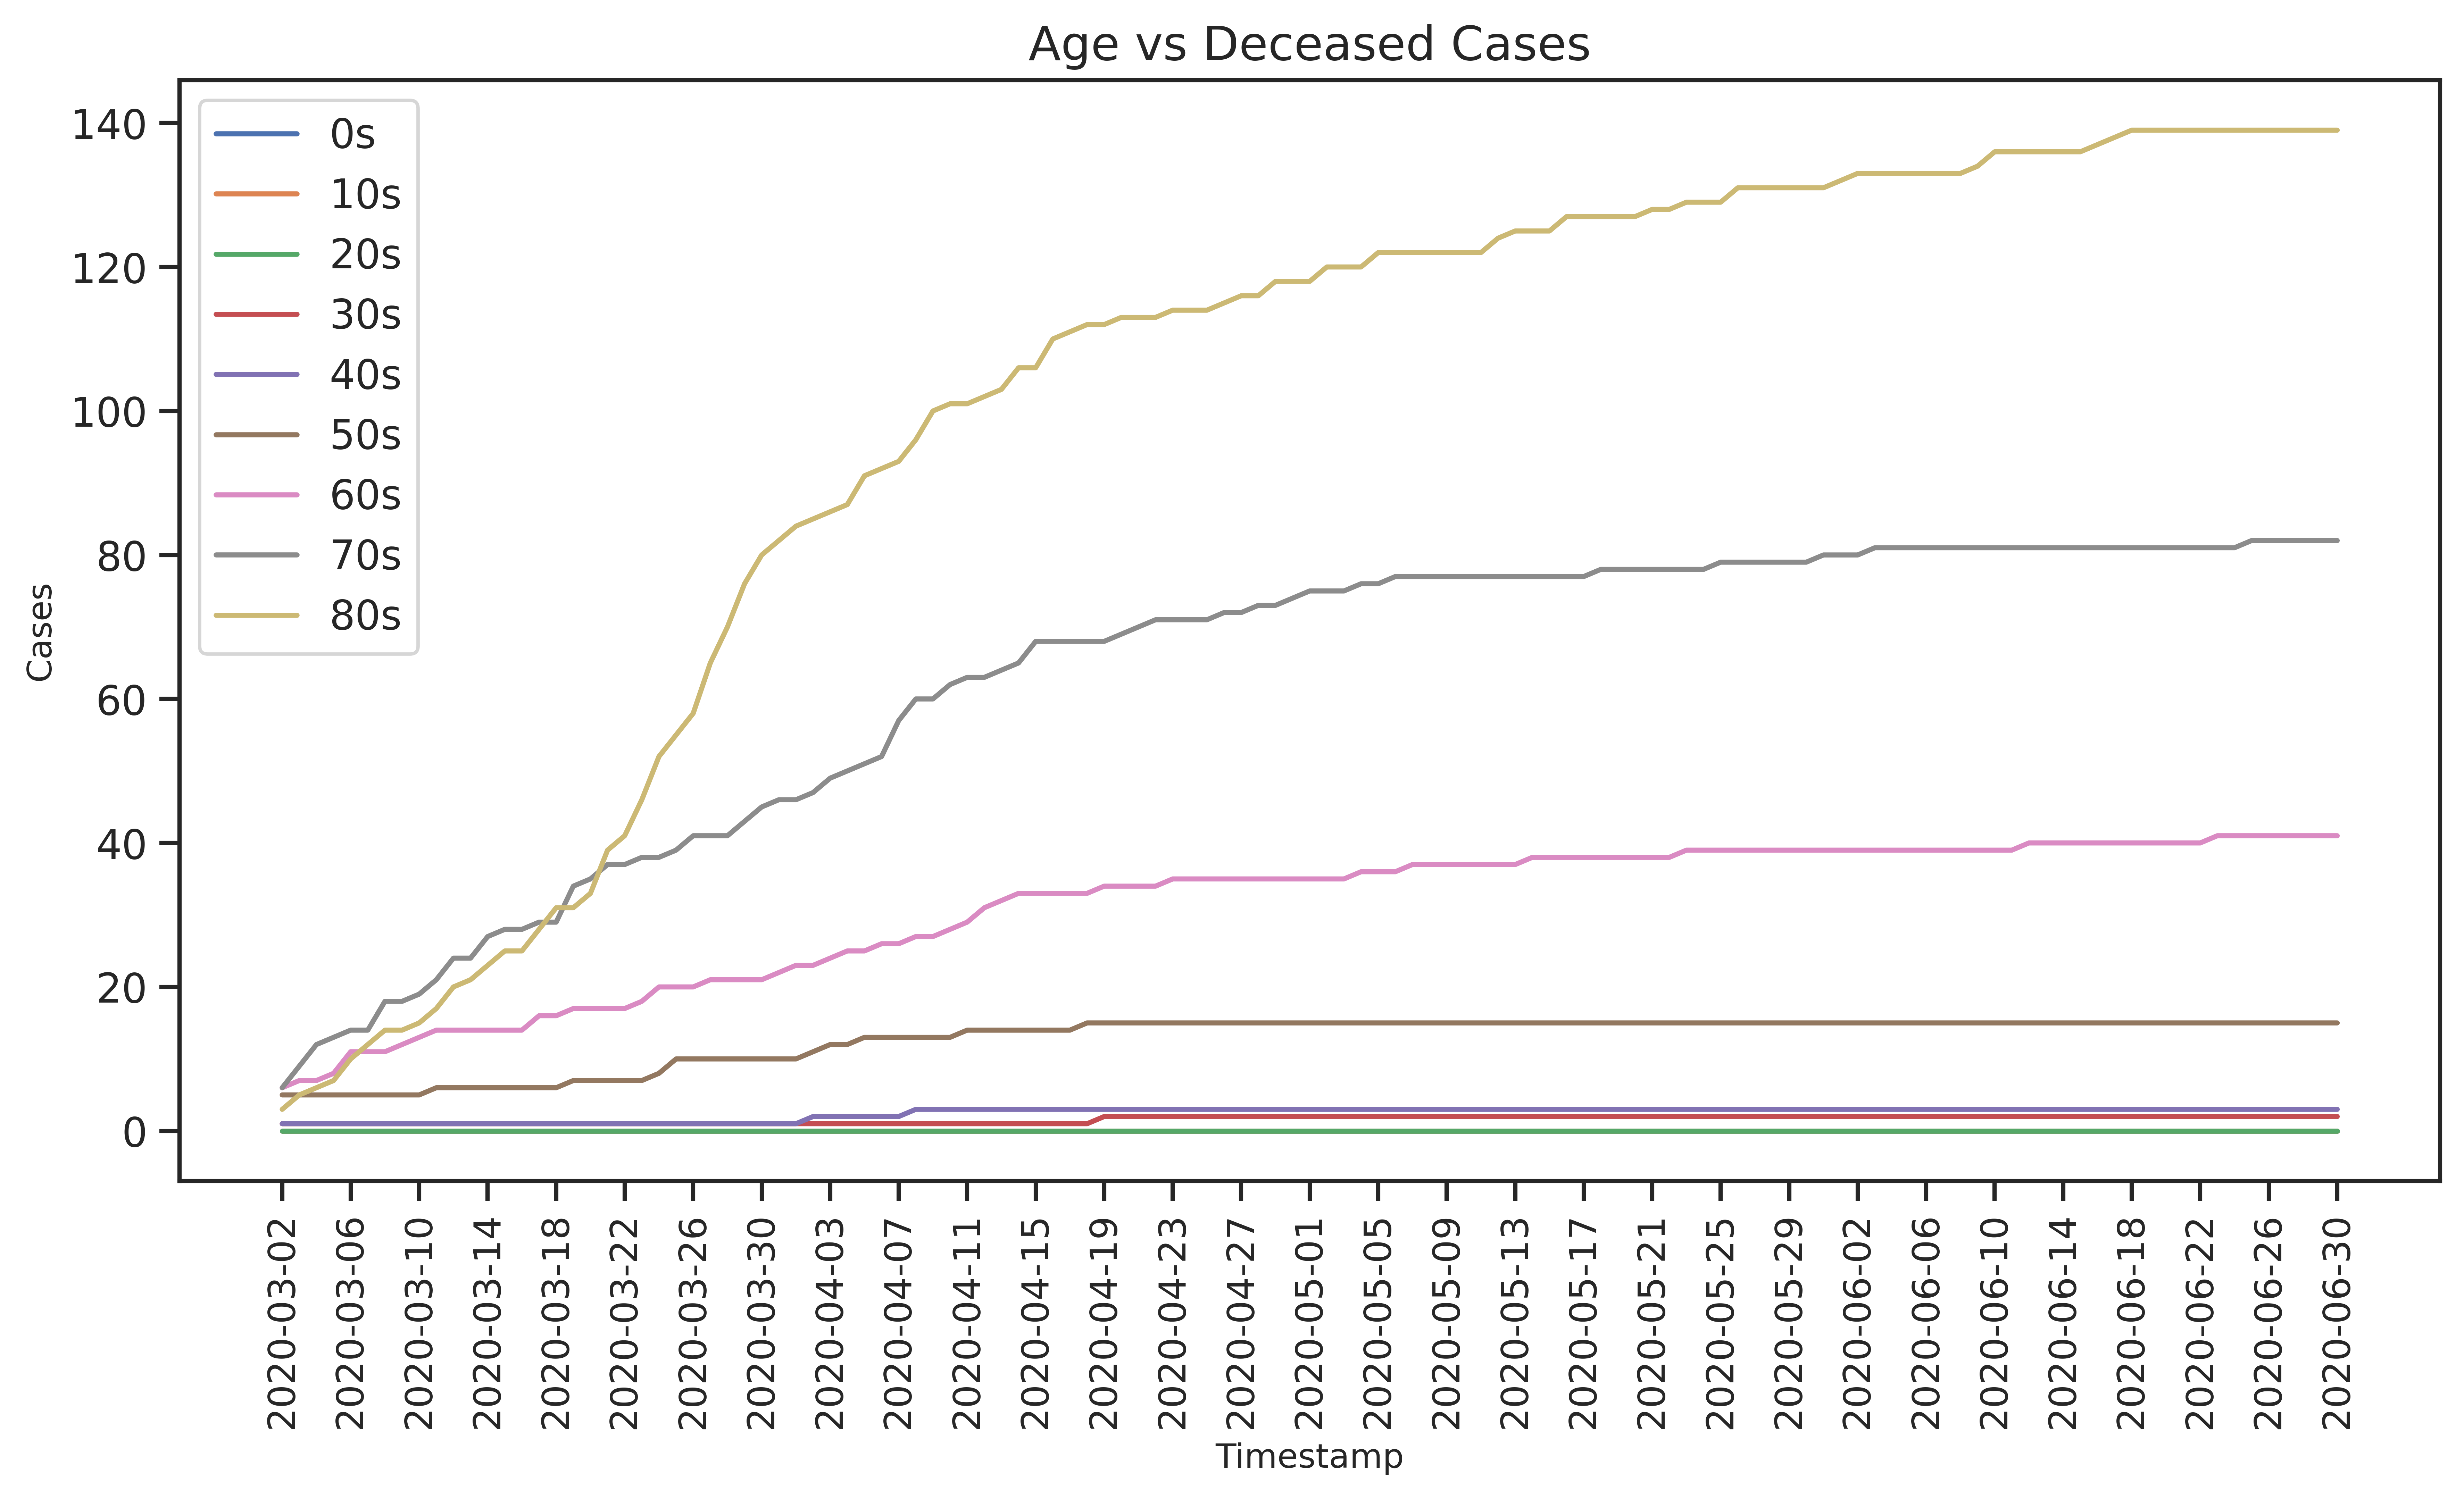

<Figure size 8400x4200 with 0 Axes>

In [55]:
sns.set(rc={"figure.dpi":700, 'savefig.dpi':700})
sns.set_style('ticks')
fontsize = 12

plt.rcParams["figure.figsize"] = (12, 6)
plt.title("Age vs Deceased Cases", fontsize=14)
plt.ylabel("Cases", fontsize=10)
plt.xlabel("Timestamp", fontsize=10)

plt.xticks(list(range(len(dates))), dates[::4], rotation='vertical')
plt.locator_params(axis='x', nbins=len(dates)/4)
plt.yticks(fontsize= fontsize)

for i in range(len(ages_deceased)):
  age = [list(x[1].items())[i][0] for x in TimeAge_dates_ages_deceased][0]
  age_list = [list(x[1].items())[i][1] for x in TimeAge_dates_ages_deceased]
  plt.plot(age_list, label = str(age).split('_')[0], linestyle='-')


plt.legend(prop={'size': fontsize})
plt.show()
plt.clf()

In [56]:
TimeGender_df

,date_,female_confirmed,male_confirmed,female_deceased,male_deceased
0,2020-03-02,2621,1591,9,13
1,2020-03-03,3002,1810,12,16
2,2020-03-04,3332,1996,12,20
3,2020-03-05,3617,2149,14,21
4,2020-03-06,3939,2345,17,25
...,...,...,...,...,...
116,2020-06-26,7218,5384,131,151
117,2020-06-27,7241,5412,131,151
118,2020-06-28,7265,5450,131,151
119,2020-06-29,7287,5470,131,151


In [57]:
dates = TimeGender_df['date_'].unique()
sexes_confirmed = list()
sexes_deceased = list()
for col in TimeGender_df.columns.to_list():
  if 'confirmed' in col:
    sexes_confirmed.append(col)
  if 'deceased' in col:
    sexes_deceased.append(col)

TimeGender_dates_sexes_confirmed = list()
TimeGender_dates_sexes_deceased = list()
for date in dates:
  date_TimeGender_df = TimeGender_df[TimeGender_df['date_'] == date]
  TimeGender_sexes_confirmed = dict()
  TimeGender_sexes_deceased = dict()
  for sex in sexes_confirmed:
    date_sex_TimeGender_df = date_TimeGender_df[sex]
    TimeGender_sexes_confirmed[sex] = date_sex_TimeGender_df.to_list()[0]
  for sex in sexes_deceased:
    date_sex_TimeGender_df = date_TimeGender_df[sex]
    TimeGender_sexes_deceased[sex] = date_sex_TimeGender_df.to_list()[0]
  TimeGender_dates_sexes_confirmed.append((date, TimeGender_sexes_confirmed))
  TimeGender_dates_sexes_deceased.append((date, TimeGender_sexes_deceased))

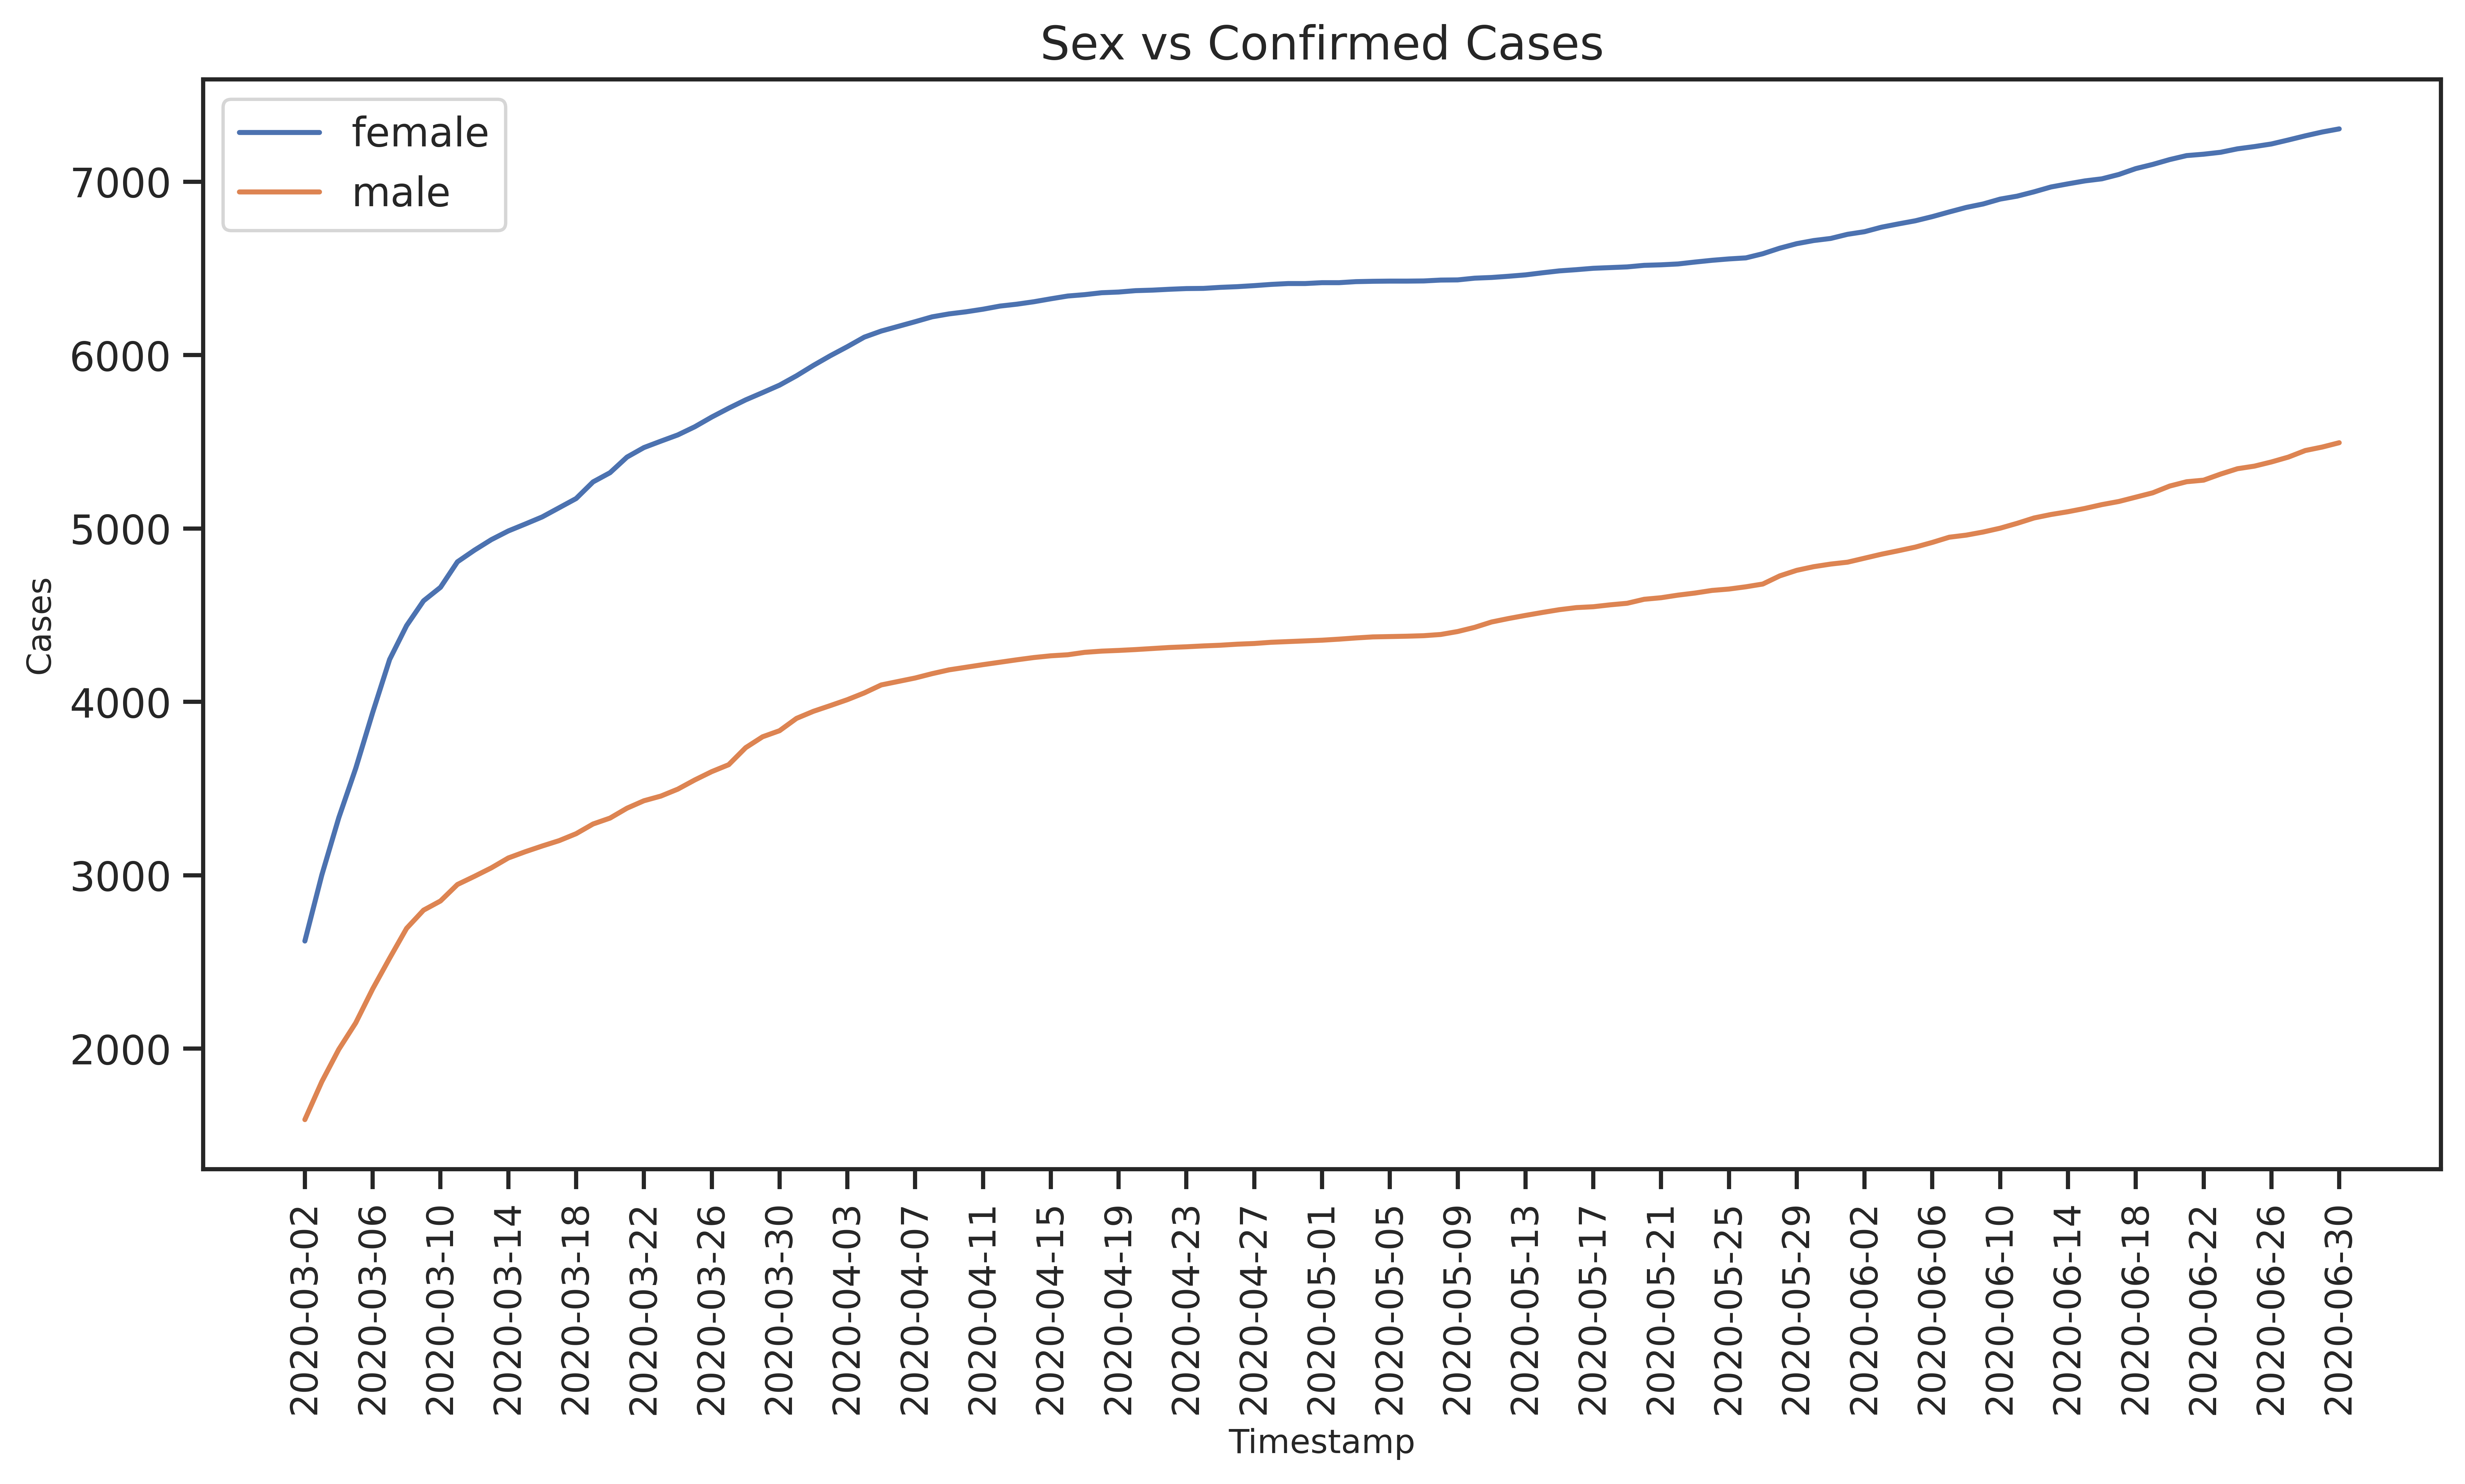

<Figure size 8400x4200 with 0 Axes>

In [59]:
sns.set(rc={"figure.dpi":700, 'savefig.dpi':700})
sns.set_style('ticks')
fontsize = 12

plt.rcParams["figure.figsize"] = (12, 6)
plt.title("Sex vs Confirmed Cases", fontsize=14)
plt.ylabel("Cases", fontsize=10)
plt.xlabel("Timestamp", fontsize=10)

plt.xticks(list(range(len(dates))), dates[::4], rotation='vertical')
plt.locator_params(axis='x', nbins=len(dates)/4)
plt.yticks(fontsize= fontsize)

for i in range(len(sexes_confirmed)):
  sex = [list(x[1].items())[i][0] for x in TimeGender_dates_sexes_confirmed][0]
  sex_list = [list(x[1].items())[i][1] for x in TimeGender_dates_sexes_confirmed]
  plt.plot(sex_list, label = str(sex).split('_')[0], linestyle='-')


plt.legend(prop={'size': fontsize})
plt.show()
plt.clf()

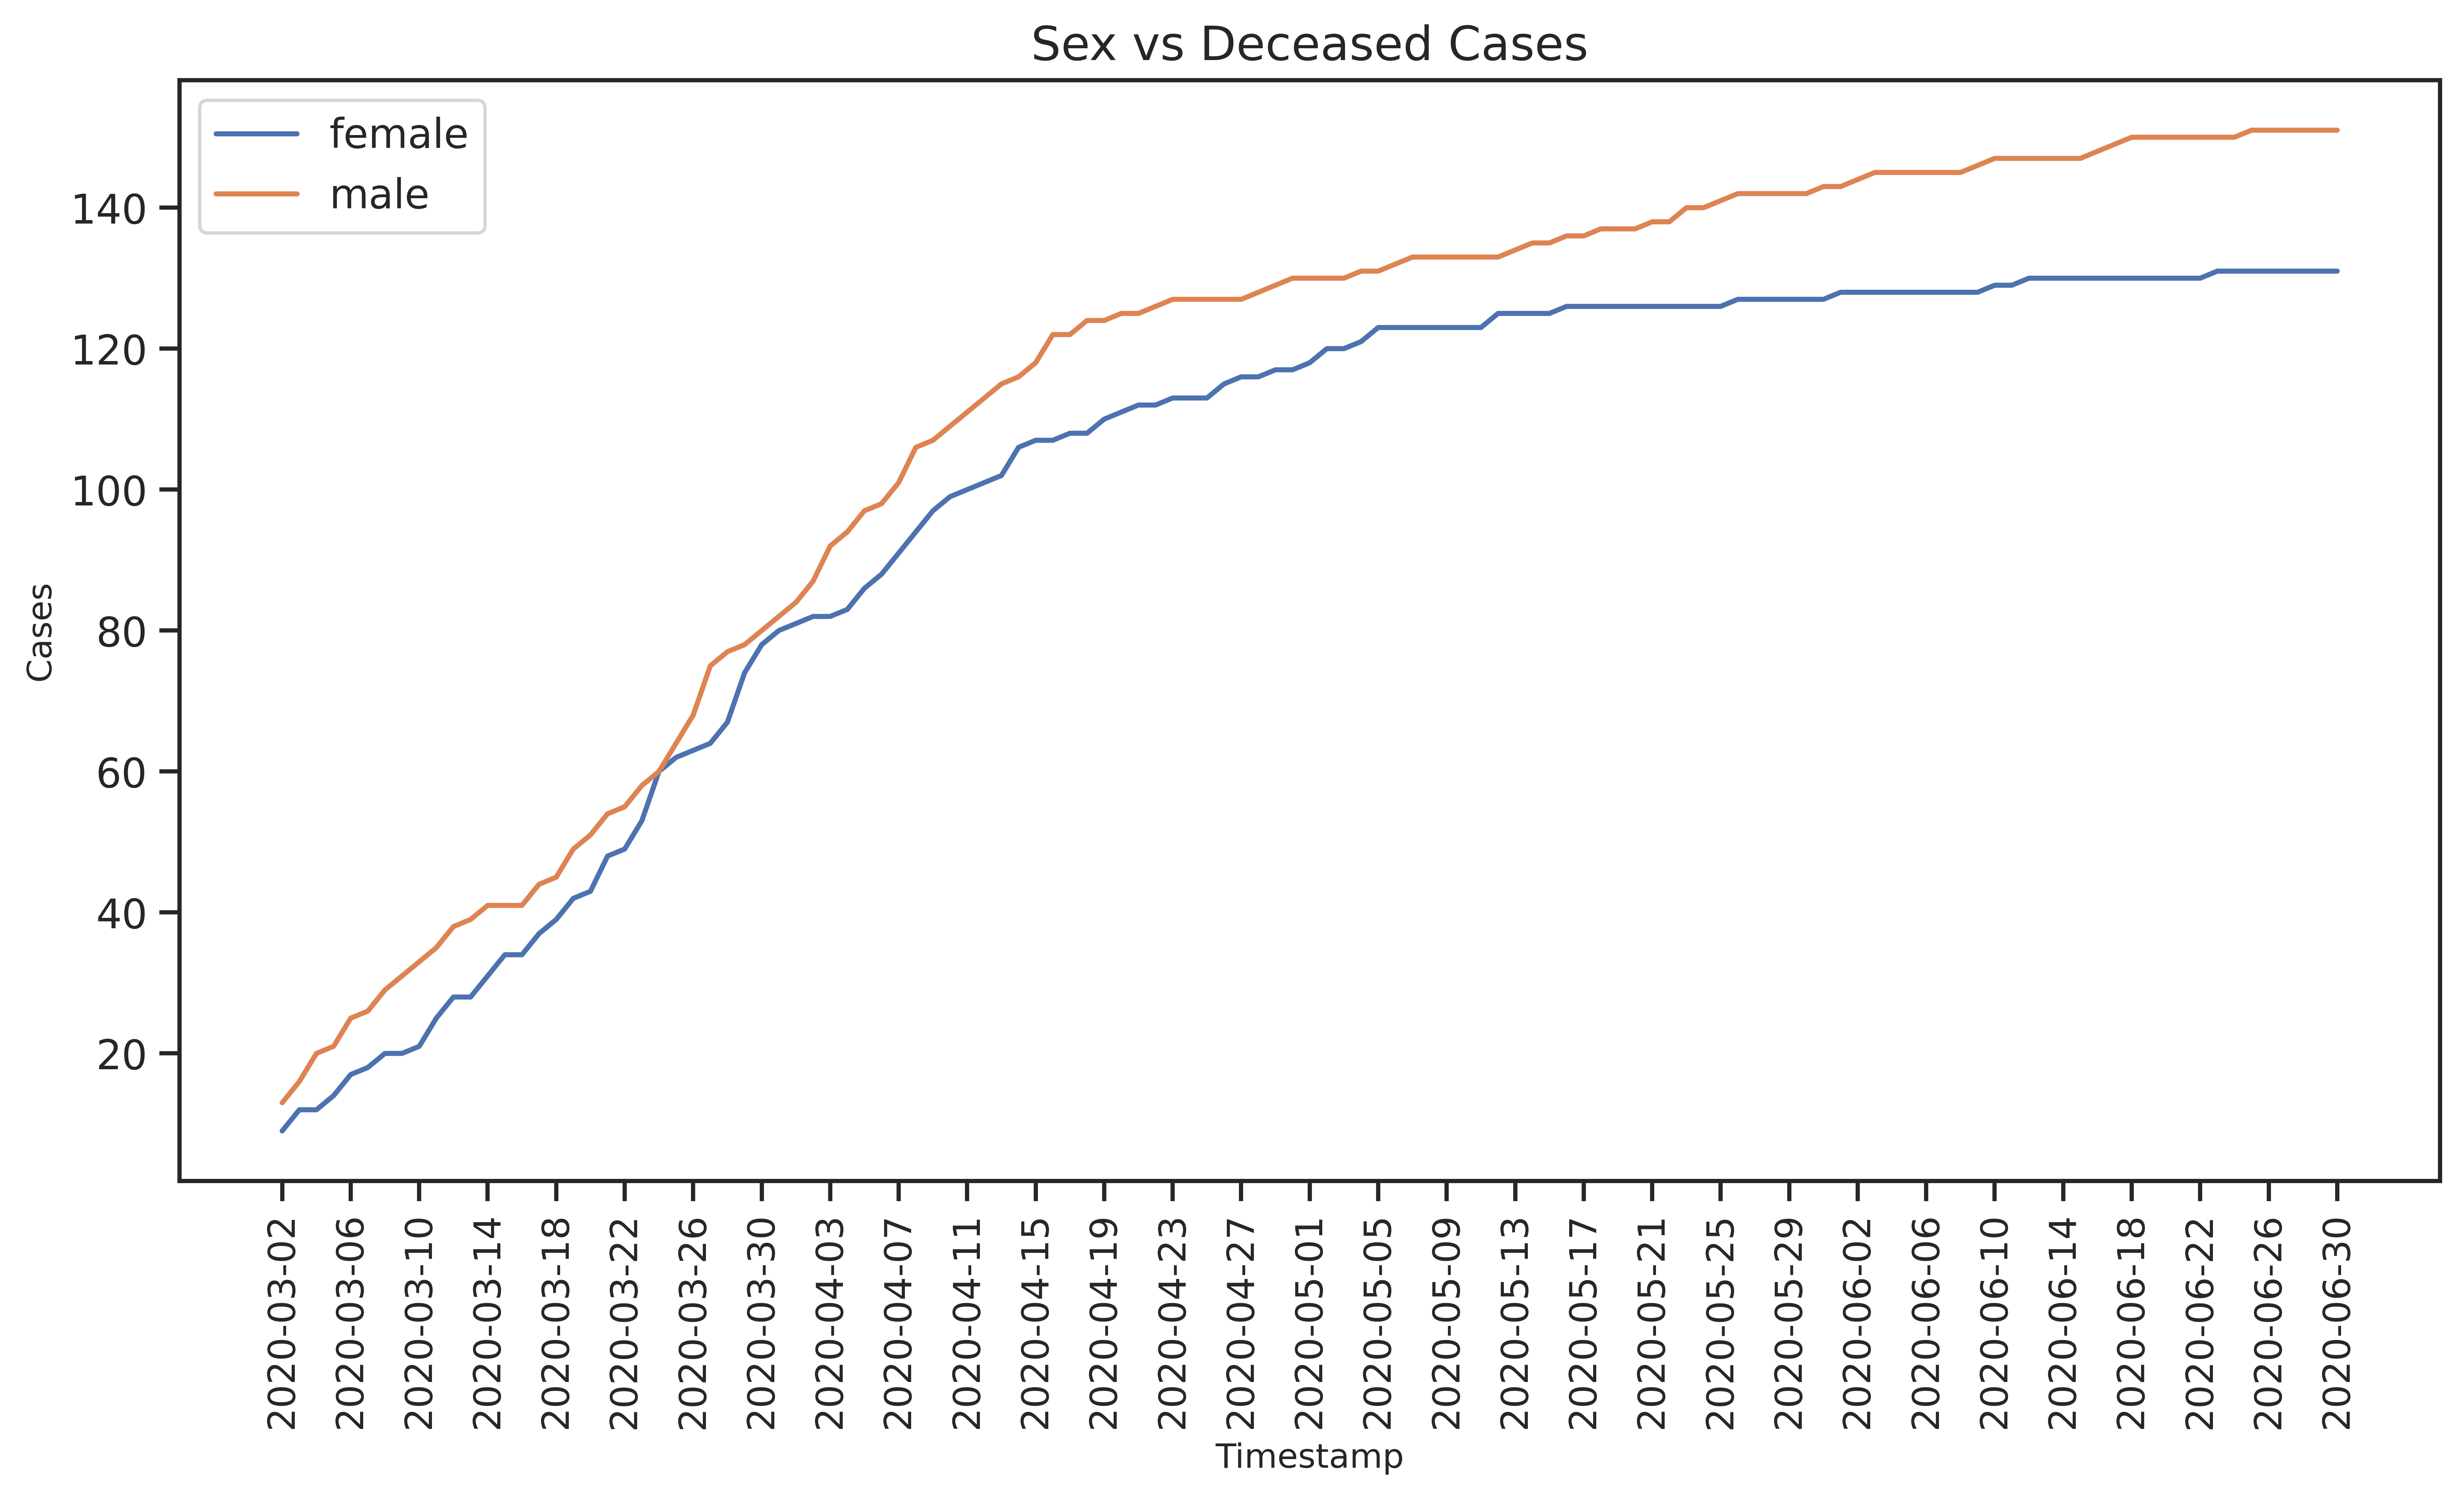

<Figure size 8400x4200 with 0 Axes>

In [60]:
sns.set(rc={"figure.dpi":700, 'savefig.dpi':700})
sns.set_style('ticks')
fontsize = 12

plt.rcParams["figure.figsize"] = (12, 6)
plt.title("Sex vs Deceased Cases", fontsize=14)
plt.ylabel("Cases", fontsize=10)
plt.xlabel("Timestamp", fontsize=10)

plt.xticks(list(range(len(dates))), dates[::4], rotation='vertical')
plt.locator_params(axis='x', nbins=len(dates)/4)
plt.yticks(fontsize= fontsize)

for i in range(len(sexes_deceased)):
  sex = [list(x[1].items())[i][0] for x in TimeGender_dates_sexes_deceased][0]
  sex_list = [list(x[1].items())[i][1] for x in TimeGender_dates_sexes_deceased]
  plt.plot(sex_list, label = str(sex).split('_')[0], linestyle='-')


plt.legend(prop={'size': fontsize})
plt.show()
plt.clf()